<a href="https://colab.research.google.com/github/Gavesh01/Saveheart/blob/main/Saveheart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Section 1: Data Preprocessing**

1. Import Libraries



In [ ]:
# Install required libraries
!pip install pandas numpy==1.23.5 imbalanced-learn matplotlib seaborn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE


2. Load Dataset

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define file path
heart_path = '/content/drive/My Drive/Heart/heart.csv'

# Load the dataset
df = pd.read_csv(heart_path)
print("Dataset loaded successfully!")
print("Dataset shape:", df.shape)
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded successfully!
Dataset shape: (918, 12)
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


3. Data Preprocessing

In [ ]:
# Data preprocessing
df.drop_duplicates(inplace=True)

# Encode categorical features
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
features = df.drop(columns=['HeartDisease']).values
target = df['HeartDisease'].values

# Handle data imbalance using SMOTE
smote = SMOTE(random_state=42)
features_resampled, target_resampled = smote.fit_resample(features, target)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    features_resampled, target_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
df.shape

(918, 12)

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

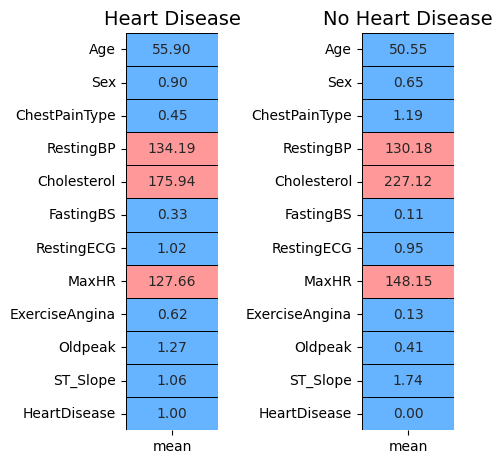

In [ ]:
# Filter data for Heart Disease and No Heart Disease
yes = df[df['HeartDisease'] == 1].describe().T
no = df[df['HeartDisease'] == 0].describe().T
colors = ['#66b3ff', '#ff9999']  # Custom colors

# Create subplots for the heatmaps
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))

# Heatmap for Heart Disease
plt.subplot(1, 2, 1)
sns.heatmap(
    yes[['mean']],
    annot=True,
    cmap=colors,
    linewidths=0.4,
    linecolor='black',
    cbar=False,
    fmt='.2f'
)
plt.title('Heart Disease', fontsize=14)

# Heatmap for No Heart Disease
plt.subplot(1, 2, 2)
sns.heatmap(
    no[['mean']],
    annot=True,
    cmap=colors,
    linewidths=0.4,
    linecolor='black',
    cbar=False,
    fmt='.2f'
)
plt.title('No Heart Disease', fontsize=14)

# Adjust layout
fig.tight_layout(pad=2)
plt.show()


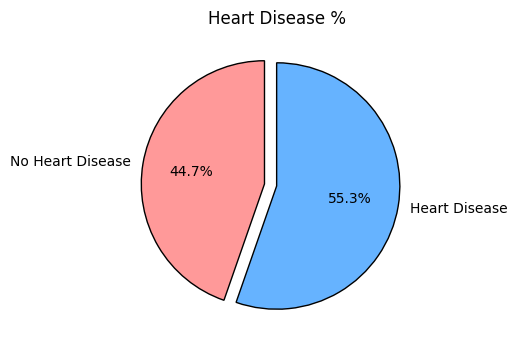

In [ ]:
l = list(df['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100, l[0] / sum(l) * 100]

# Create a single plot for the pie chart
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust size as needed
plt.pie(
    circle,
    labels=['No Heart Disease', 'Heart Disease'],
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.1, 0),
    colors=['#ff9999', '#66b3ff'],
    wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}
)
plt.title('Heart Disease %')
plt.show()

Dividing features into Numerical and Categorical

4. Model Training and Evaluation Functions

# Decision Tree Evaluation

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

# Decision Tree Evaluation
def evaluate_decision_tree(dt_classifier, x_train, y_train, x_test, y_test):
    dt_classifier.fit(x_train, y_train)
    prediction = dt_classifier.predict(x_test)
    train_prediction = dt_classifier.predict(x_train)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    print("\n--- Decision Tree Evaluation ---")
    print("Accuracy:", '{0:.2%}'.format(accuracy_score(y_test, prediction)))
    print("Training Accuracy:", '{0:.2%}'.format(accuracy_score(y_train, train_prediction)))
    print("Cross Validation Score:", '{0:.2%}'.format(cross_val_score(
        dt_classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()))
    print("ROC_AUC Score:", '{0:.2%}'.format(roc_auc_score(y_test, prediction)))


classifier_dt = DecisionTreeClassifier(random_state=42, max_depth=4, criterion='entropy')

# Evaluate Decision Tree
evaluate_decision_tree(classifier_dt, x_train, y_train, x_test, y_test)


--- Decision Tree Evaluation ---
Accuracy: 82.84%
Training Accuracy: 88.30%
Cross Validation Score: 90.17%
ROC_AUC Score: 82.17%


# Logistic Regression Evaluation

In [ ]:
def evaluate_logistic_regression(lr_classifier, x_train_scaled, y_train, x_test_scaled, y_test):
    """
    Evaluate Logistic Regression and print metrics without additional imports.

    Parameters:
        lr_classifier: LogisticRegression object.
        x_train_scaled: Scaled training feature set.
        y_train: Training target set.
        x_test_scaled: Scaled test feature set.
        y_test: Test target set.
    """
    # Train the classifier
    lr_classifier.fit(x_train_scaled, y_train)

    # Predictions
    prediction = lr_classifier.predict(x_test_scaled)
    train_prediction = lr_classifier.predict(x_train_scaled)

    # Cross-validation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    cross_val = cross_val_score(lr_classifier, x_train_scaled, y_train, cv=cv, scoring='roc_auc').mean()

    # Metrics
    accuracy = accuracy_score(y_test, prediction)
    training_accuracy = accuracy_score(y_train, train_prediction)
    roc_auc = roc_auc_score(y_test, prediction)

    # Print results without additional imports
    print("\n--- Logistic Regression Evaluation ---")
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    print("Training Accuracy: {:.2f}%".format(training_accuracy * 100))
    print("Cross Validation Score: {:.2f}%".format(cross_val * 100))
    print("ROC_AUC Score: {:.2f}%".format(roc_auc * 100))


classifier_lr = LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs')

evaluate_logistic_regression(classifier_lr, x_train, y_train, x_test, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Logistic Regression Evaluation ---
Accuracy: 83.82%
Training Accuracy: 86.45%
Cross Validation Score: 91.79%
ROC_AUC Score: 83.44%


# Random Forest Evaluation

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Random Forest Evaluation
def evaluate_random_forest(rf_classifier, x_train, y_train, x_test, y_test):
    rf_classifier.fit(x_train, y_train)
    prediction = rf_classifier.predict(x_test)
    train_prediction = rf_classifier.predict(x_train)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    print("\n--- Random Forest Evaluation ---")
    print("Accuracy:", '{0:.2%}'.format(accuracy_score(y_test, prediction)))
    print("Training Accuracy:", '{0:.2%}'.format(accuracy_score(y_train, train_prediction)))
    print("Cross Validation Score:", '{0:.2%}'.format(cross_val_score(
        rf_classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()))
    print("ROC_AUC Score:", '{0:.2%}'.format(roc_auc_score(y_test, prediction)))

# Define classifiers
classifier_rf = RandomForestClassifier(random_state=42, max_depth=4, n_estimators=100)

# Evaluate models
evaluate_random_forest(classifier_rf, x_train, y_train, x_test, y_test)




--- Random Forest Evaluation ---
Accuracy: 86.76%
Training Accuracy: 90.52%
Cross Validation Score: 93.82%
ROC_AUC Score: 86.17%


In [ ]:
# Define classifiers
classifier_dt = DecisionTreeClassifier(random_state=42, max_depth=4, criterion='entropy')
classifier_lr = LogisticRegression(random_state=42, max_iter=500)
classifier_rf = RandomForestClassifier(random_state=42, max_depth=4, n_estimators=100)

# Evaluate each model
evaluate_decision_tree(classifier_dt, x_train, y_train, x_test, y_test)
evaluate_logistic_regression(classifier_lr, x_train, y_train, x_test, y_test)
evaluate_random_forest(classifier_rf, x_train, y_train, x_test, y_test)



--- Decision Tree Evaluation ---
Accuracy: 82.84%
Training Accuracy: 88.30%
Cross Validation Score: 90.17%
ROC_AUC Score: 82.17%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


--- Logistic Regression Evaluation ---
Accuracy: 83.82%
Training Accuracy: 86.08%
Cross Validation Score: 91.77%
ROC_AUC Score: 83.44%

--- Random Forest Evaluation ---
Accuracy: 86.76%
Training Accuracy: 90.52%
Cross Validation Score: 93.82%
ROC_AUC Score: 86.17%



--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.82      0.77      0.80        88
           1       0.83      0.87      0.85       116

    accuracy                           0.83       204
   macro avg       0.83      0.82      0.82       204
weighted avg       0.83      0.83      0.83       204


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        88
           1       0.85      0.86      0.86       116

    accuracy                           0.84       204
   macro avg       0.84      0.83      0.83       204
weighted avg       0.84      0.84      0.84       204


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




--- Random Forest ---
              precision    recall  f1-score   support

           0       0.87      0.82      0.84        88
           1       0.87      0.91      0.89       116

    accuracy                           0.87       204
   macro avg       0.87      0.86      0.86       204
weighted avg       0.87      0.87      0.87       204



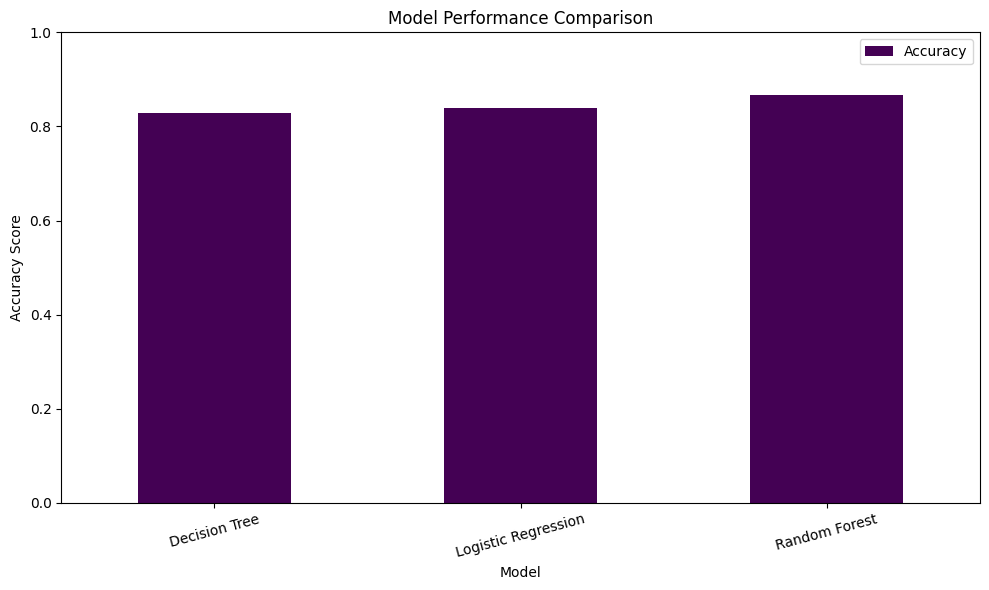

In [ ]:
# Define classifiers
classifier_dt = DecisionTreeClassifier(random_state=42, max_depth=4, criterion='entropy')
classifier_lr = LogisticRegression(random_state=42, max_iter=500)
classifier_rf = RandomForestClassifier(random_state=42, max_depth=4, n_estimators=100)

# Define model names and classifiers
models = [classifier_dt, classifier_lr, classifier_rf]
model_names = ['Decision Tree', 'Logistic Regression', 'Random Forest']

# Initialize results list
results = []

# Loop through models for evaluation
for model, model_name in zip(models, model_names):
    print(f"\n--- {model_name} ---")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Print classification report
    print(classification_report(y_test, y_pred))

    # Append accuracy to results list
    results.append({'Model': model_name, 'Accuracy': accuracy_score(y_test, y_pred)})

# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Plot model performance comparison
df_results.set_index("Model").plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.title("Model Performance Comparison")
plt.ylabel("Accuracy Score")
plt.xlabel("Model")
plt.ylim(0, 1)  # Ensure y-axis is between 0 and 1 for accuracy
plt.xticks(rotation=15)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


In [ ]:
# Feature names extracted from the dataframe
feature_names = df.drop(columns=['HeartDisease']).columns.tolist()

# Test cases with context and expected outcome
test_cases = [
    [40, 1, 1, 140, 180, 0, 172, 0, 0, 0, 1],  # Middle-aged Male, Normal Cholesterol, Heart Attack: No
    [60, 0, 2, 120, 300, 1, 130, 1, 1.5, 2, 1],  # Elderly Female, High Cholesterol, Heart Attack: Yes
    [30, 1, 3, 115, 160, 0, 120, 0, 0.0, 0, 0],  # Young Male, Normal Cholesterol, Heart Attack: No
    [70, 0, 1, 160, 250, 0, 120, 1, 2.0, 1, 1],  # Elderly Female, High BP, Heart Attack: Yes
    [45, 1, 0, 135, 200, 0, 150, 0, 0.5, 2, 0],  # Middle-aged Male, Normal Cholesterol, Heart Attack: No
    [50, 1, 2, 145, 280, 1, 140, 1, 1.2, 1, 1],  # Middle-aged Male, High Cholesterol, Heart Attack: Yes
    [25, 0, 1, 120, 170, 0, 180, 0, 0.0, 2, 0],  # Young Female, Normal Cholesterol, Heart Attack: No
    [65, 1, 3, 150, 310, 1, 110, 1, 2.5, 0, 1],  # Elderly Male, Very High Cholesterol, Heart Attack: Yes
    [35, 0, 0, 125, 190, 0, 160, 0, 0.8, 0, 0],  # Young Female, Normal BP, Heart Attack: No
    [75, 1, 1, 170, 320, 1, 105, 1, 3.0, 1, 1]   # Elderly Male, Very High BP, Heart Attack: Yes
]


def test_cases_predictions(classifier, test_cases, feature_names, scaler=None, is_tree=False):
    """
    Test the classifier on predefined test cases and include 'Heart Disease: Yes/No' in the output.
    """
    print(f"\nTesting with {classifier.__class__.__name__}")
    for i, case in enumerate(test_cases, start=1):
        print(f"\nTest Case {i}: {dict(zip(feature_names, case))}")
        user_input = np.array(case).reshape(1, -1)

        # Scale for Logistic Regression if needed
        if not is_tree and scaler is not None:
            user_input = scaler.transform(user_input)

        # Predict
        prediction = classifier.predict(user_input)

        # Probabilities (if supported)
        if hasattr(classifier, "predict_proba"):
            probabilities = classifier.predict_proba(user_input)[0]
            prob_heart_disease = probabilities[1] * 100
            prob_no_heart_disease = probabilities[0] * 100
            print(f"Probability of Heart Disease: {prob_heart_disease:.2f}%")
            print(f"Probability of No Heart Disease: {prob_no_heart_disease:.2f}%")

        # Display prediction
        if prediction[0] == 1:
            print("Prediction: At risk of Heart Disease.")
            print("Heart Disease: Yes")
        else:
            print("Prediction: NOT at risk of Heart Disease.")
            print("Heart Disease: No")

test_cases_predictions(classifier_rf, test_cases, feature_names, is_tree=True)


Testing with RandomForestClassifier

Test Case 1: {'Age': 40, 'Sex': 1, 'ChestPainType': 1, 'RestingBP': 140, 'Cholesterol': 999, 'FastingBS': 0, 'RestingECG': 999, 'MaxHR': 0, 'ExerciseAngina': 0, 'Oldpeak': 0, 'ST_Slope': 1}
Probability of Heart Disease: 53.73%
Probability of No Heart Disease: 46.27%
Prediction: At risk of Heart Disease.
Heart Disease: Yes

Test Case 2: {'Age': 60, 'Sex': 0, 'ChestPainType': 2, 'RestingBP': 120, 'Cholesterol': 300, 'FastingBS': 1, 'RestingECG': 130, 'MaxHR': 1, 'ExerciseAngina': 1.5, 'Oldpeak': 2, 'ST_Slope': 1}
Probability of Heart Disease: 74.29%
Probability of No Heart Disease: 25.71%
Prediction: At risk of Heart Disease.
Heart Disease: Yes

Test Case 3: {'Age': 30, 'Sex': 1, 'ChestPainType': 3, 'RestingBP': 115, 'Cholesterol': 160, 'FastingBS': 0, 'RestingECG': 130, 'MaxHR': 0, 'ExerciseAngina': 0.0, 'Oldpeak': 0, 'ST_Slope': 0}
Probability of Heart Disease: 54.30%
Probability of No Heart Disease: 45.70%
Prediction: At risk of Heart Disease.
Hea